<a href="https://colab.research.google.com/github/Soodeh1981/bivpois/blob/master/neural%20networl%20MLP%20in%20cancer%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **"نحوه اجرای شبکه عصبی MLP در داده‌های پزشکی"**

# دیتاست تشخیص سرطان سینه (Breast Cancer Wisconsin) که از کتابخانه scikit-learn قابل دسترسی است. این دیتاست شامل ویژگی‌هایی مانند اندازه تومور، شکل سلول‌ها و غیره است و هدف آن طبقه‌بندی نمونه‌ها به خوش‌خیم (benign) یا بدخیم (malignant) است.**bold text** [link text](https://)

پروژه به زبان پایتون نوشته شده و از کتابخانه‌های numpy، pandas، matplotlib، scikit-learn و keras (برای MLP) استفاده می‌کند. دانشجویان باید این کتابخانه‌ها را نصب کنند (با pip install).
مراحل پروژه به ترتیب عبارتند از:

تعریف مسئله
جمع‌آوری داده
پیش‌پردازش داده
کاوش داده (EDA)
مدل‌سازی (اجرای MLP)
ارزیابی مدل
نتیجه‌گیری و گزارش

مرحله 1: تعریف مسئله
هدف: پیش‌بینی اینکه آیا یک تومور سینه خوش‌خیم است یا بدخیم، بر اساس ویژگی‌های پزشکی.

نوع مسئله: طبقه‌بندی دودویی (binary classification).
اهمیت: در پزشکی، تشخیص زودهنگام می‌تواند جان افراد را نجات دهد.
# معیار موفقیت: دقت (accuracy) بالای 90%، و بررسی معیارهایی مانند precision، recall و F1-score برای جلوگیری از خطاهای کاذب منفی.

مرحله 2: جمع‌آوری داده
از دیتاست آماده Breast Cancer Wisconsin استفاده می‌کنیم که شامل 569 نمونه، 30 ویژگی عددی و یک برچسب (0 برای خوش‌خیم، 1 برای بدخیم) است.
کد برای بارگذاری داده:

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# بارگذاری داده
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# نمایش اطلاعات اولیه
print(df.shape)
print(df.head())
print(df['target'].value_counts())

(569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0   

مرحله 3: پیش‌پردازش داده
در این مرحله، داده‌ها را تمیز می‌کنیم، مقادیر گمشده را بررسی می‌کنیم، ویژگی‌ها را نرمال‌سازی می‌کنیم و داده‌ها را به train/test تقسیم می‌کنیم.

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# بررسی مقادیر گمشده
print(df.isnull().sum())  # باید صفر باشد

# جداسازی ویژگی‌ها و برچسب
X = df.drop('target', axis=1)
y = df['target']

# نرمال‌سازی ویژگی‌ها (برای بهبود عملکرد MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده به train (80%) و test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
(455, 30) (114, 30)


مرحله 4: کاوش داده (Exploratory Data Analysis - EDA)
برای درک داده‌ها، توزیع ویژگی‌ها، همبستگی و تعادل کلاس‌ها را بررسی می‌کنیم.

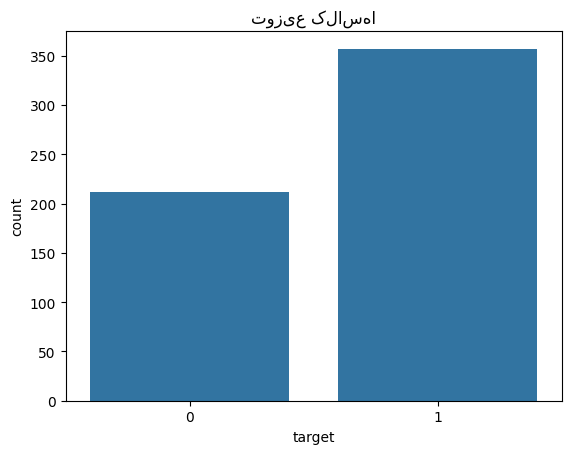

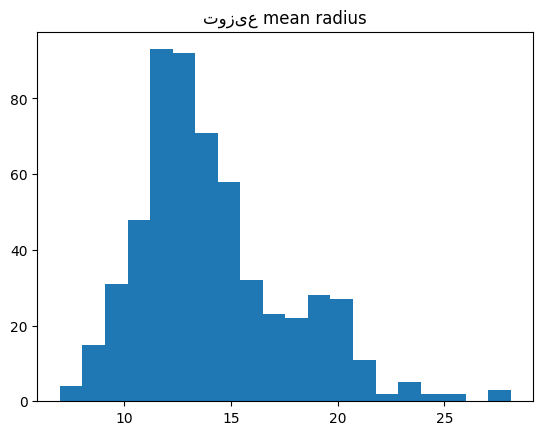

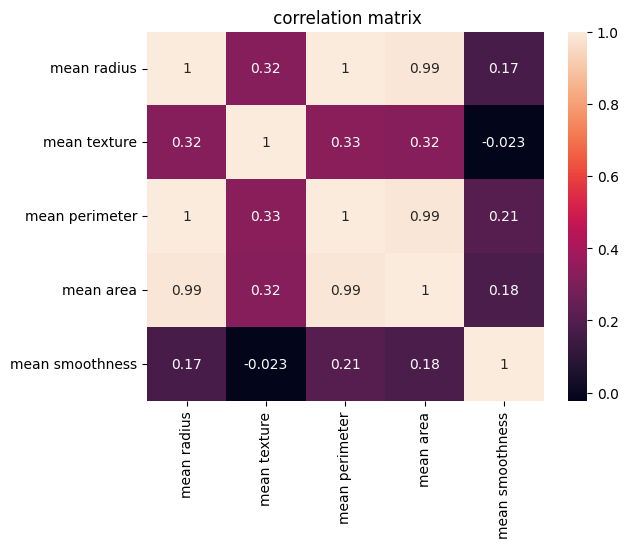

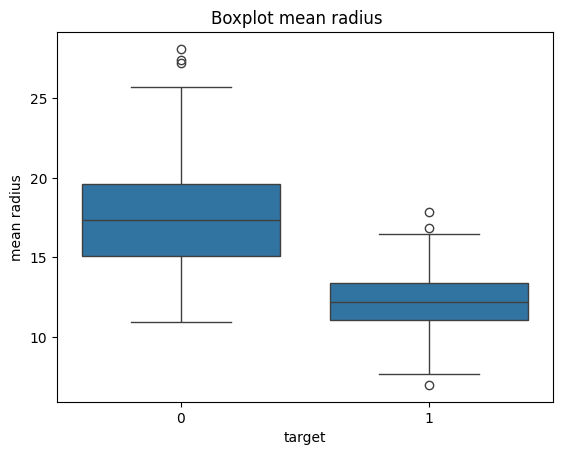

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# توزیع کلاس‌ها
sns.countplot(x=df['target'])
plt.title('توزیع کلاس‌ها')
plt.show()

# هیستوگرام یک ویژگی نمونه
plt.hist(df['mean radius'], bins=20)
plt.title('توزیع mean radius')
plt.show()

# ماتریس همبستگی (نمونه کوچک)
corr = df.iloc[:, :5].corr()  # برای 5 ویژگی اول
sns.heatmap(corr, annot=True)
plt.title(' correlation matrix')
plt.show()

# بررسی outliers با boxplot
sns.boxplot(x=df['target'], y=df['mean radius'])
plt.title('Boxplot mean radius   ')
plt.show()

مرحله 5: مدل‌سازی (اجرای شبکه عصبی MLP)
از Keras برای ساخت MLP استفاده می‌کنیم. مدل شامل لایه ورودی (30 نورون)، دو لایه پنهان (64 و 32 نورون) با فعال‌سازی ReLU، و لایه خروجی با sigmoid برای طبقه‌بندی دودویی.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# ساخت مدل MLP
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))  # لایه پنهان اول
model.add(Dense(32, activation='relu'))  # لایه پنهان دوم
model.add(Dense(1, activation='sigmoid'))  # لایه خروجی

# کامپایل مدل
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# آموزش مدل
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# نمایش خلاصه مدل
model.summary()

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6449 - loss: 0.6317 - val_accuracy: 0.8571 - val_loss: 0.3684
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8607 - loss: 0.3520 - val_accuracy: 0.9451 - val_loss: 0.2406
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9288 - loss: 0.2492 - val_accuracy: 0.9451 - val_loss: 0.1840
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9470 - loss: 0.1556 - val_accuracy: 0.9560 - val_loss: 0.1523
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9632 - loss: 0.1331 - val_accuracy: 0.9560 - val_loss: 0.1337
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9796 - loss: 0.1030 - val_accuracy: 0.9670 - val_loss: 0.1214
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9847 - loss: 0.0945 - val_accuracy: 0.9670 - val_loss: 0.1129
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9838 - loss: 0.0866 - val_accuracy: 0.9670 - val_loss: 0.1073
Ep

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

مرحله 6: ارزیابی مدل
# مدل را روی داده test ارزیابی می‌کنیم و معیارها را محاسبه می‌کنیم.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96


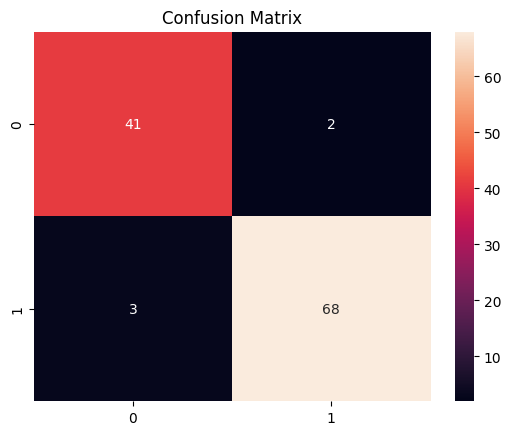

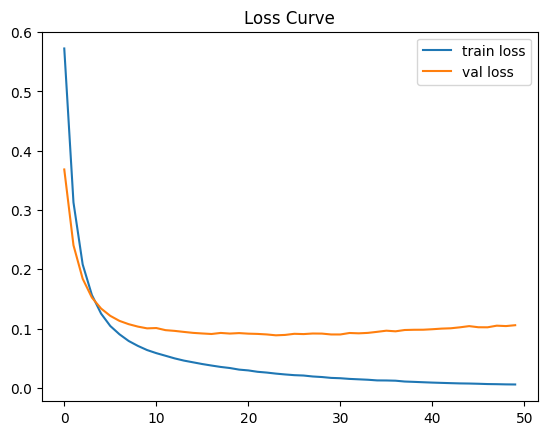

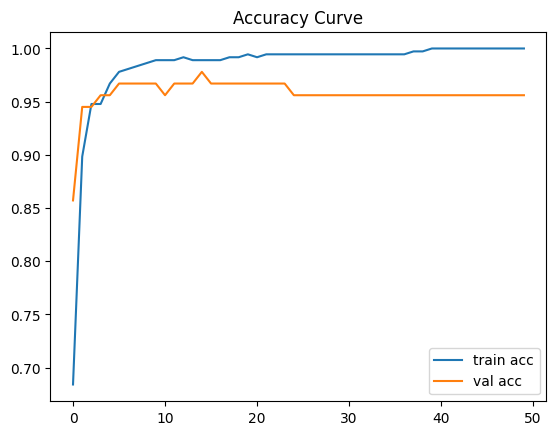

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# پیش‌بینی روی test
y_pred = (model.predict(X_test) > 0.5).astype(int)

# محاسبه معیارها
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc:.2f}')
print(f'Precision: {prec:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1-Score: {f1:.2f}')

# ماتریس confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# نمودار loss و accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

مقایسه روش‌های مختلف Weight Initialization در MLP
هدف این بخش
نشان دادن اینکه چطور انتخاب روش اولیه‌سازی وزن‌ها روی:

سرعت همگرایی (سرعت کاهش loss)
دقت نهایی
پایداری آموزش (overfitting یا نوسانات)

# تأثیر می‌گذارد. **bold text**


در حال آموزش با initializer = glorot_uniform ...

در حال آموزش با initializer = glorot_normal ...

در حال آموزش با initializer = he_normal ...

در حال آموزش با initializer = he_uniform ...

در حال آموزش با initializer = random_normal ...


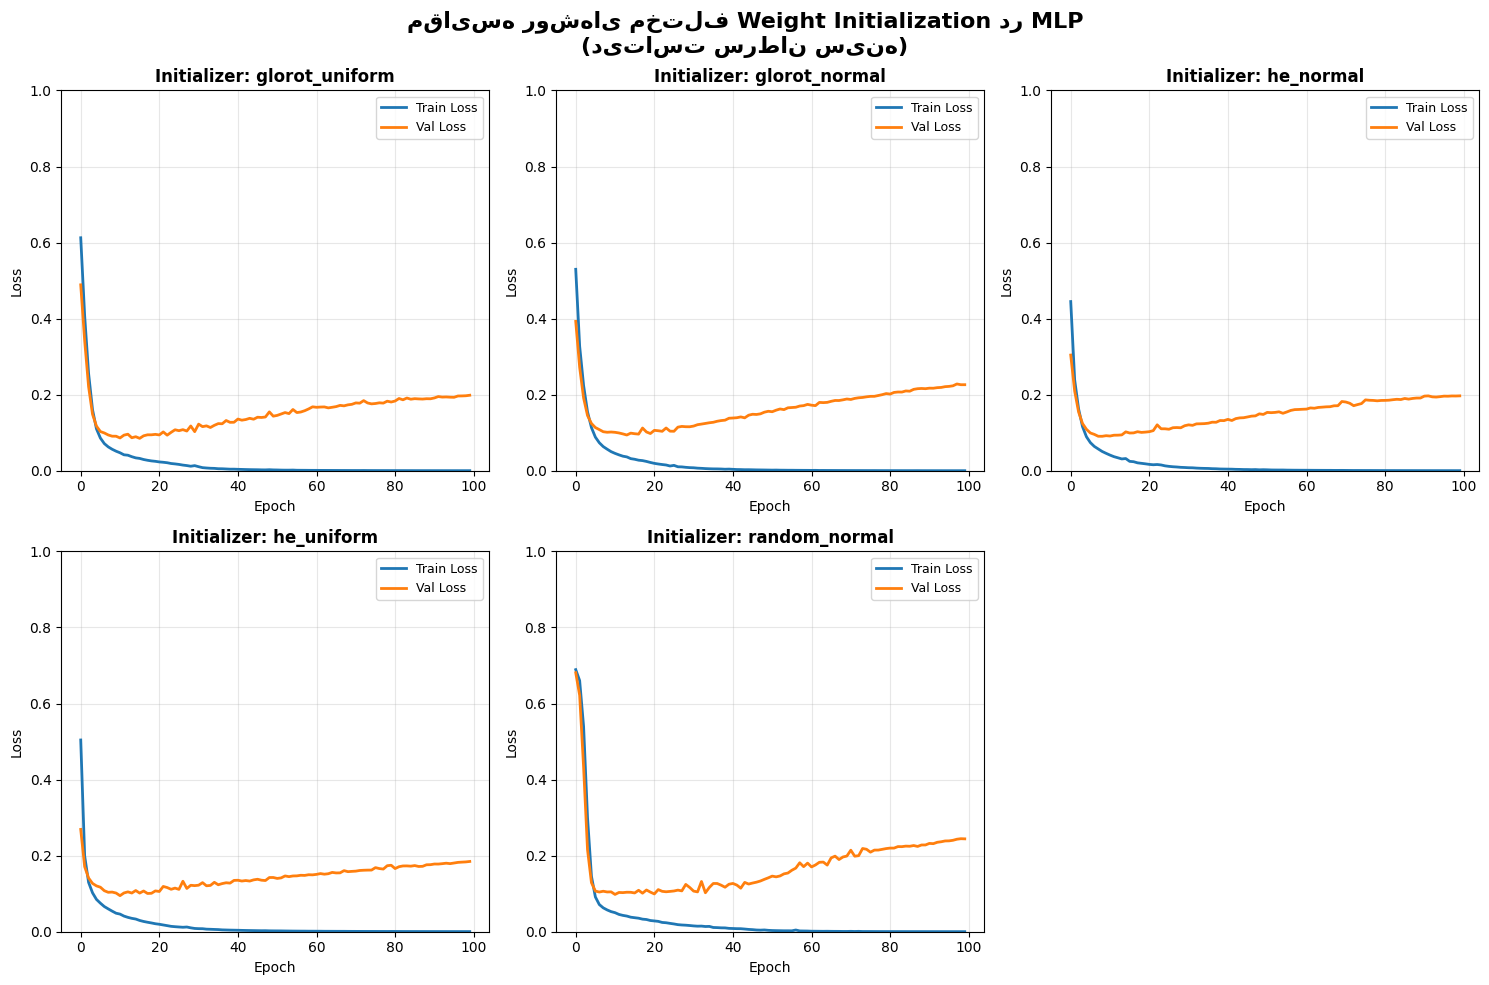

In [7]:
# مقایسه تاثیر Weight Initialization در MLP
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# داده همان دیتاست قبلی
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# لیست روش‌های اولیه‌سازی
initializers = [
    'glorot_uniform',   # Xavier Uniform (پیش‌فرض)
    'glorot_normal',    # Xavier Normal
    'he_normal',        # He Normal (بهترین برای ReLU)
    'he_uniform',       # He Uniform
    'random_normal'     # تصادفی ساده (معمولاً بد)
]

plt.figure(figsize=(15, 10))
histories = {}

for i, init in enumerate(initializers):
    print(f"\nدر حال آموزش با initializer = {init} ...")

    model = Sequential([
        Dense(64, input_dim=30, activation='relu', kernel_initializer=init),
        Dense(32, activation='relu', kernel_initializer=init),
        Dense(16, activation='relu', kernel_initializer=init),
        Dense(1, activation='sigmoid', kernel_initializer=init)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # آموزش با early stopping ساده (اختیاری)
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)

    histories[init] = history

    # رسم loss
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    plt.title(f'Initializer: {init}', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)

plt.suptitle('مقایسه روش‌های مختلف Weight Initialization در MLP\n(دیتاست سرطان سینه)',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# **مقایسه ۸ روش بهینه‌سازی (Optimizer) در شبکه عصبی MLP**

در حال آموزش ۸ optimizer مختلف...
آموزش با SGD             ... دقت نهایی: 0.9649
آموزش با SGD + Momentum  ... دقت نهایی: 0.9737
آموزش با Nesterov        ... دقت نهایی: 0.9737
آموزش با Adagrad         ... دقت نهایی: 0.9737
آموزش با RMSprop         ... دقت نهایی: 0.9737
آموزش با Adam            ... دقت نهایی: 0.9649
آموزش با Nadam           ... دقت نهایی: 0.9649
آموزش با AdamW           ... دقت نهایی: 0.9825


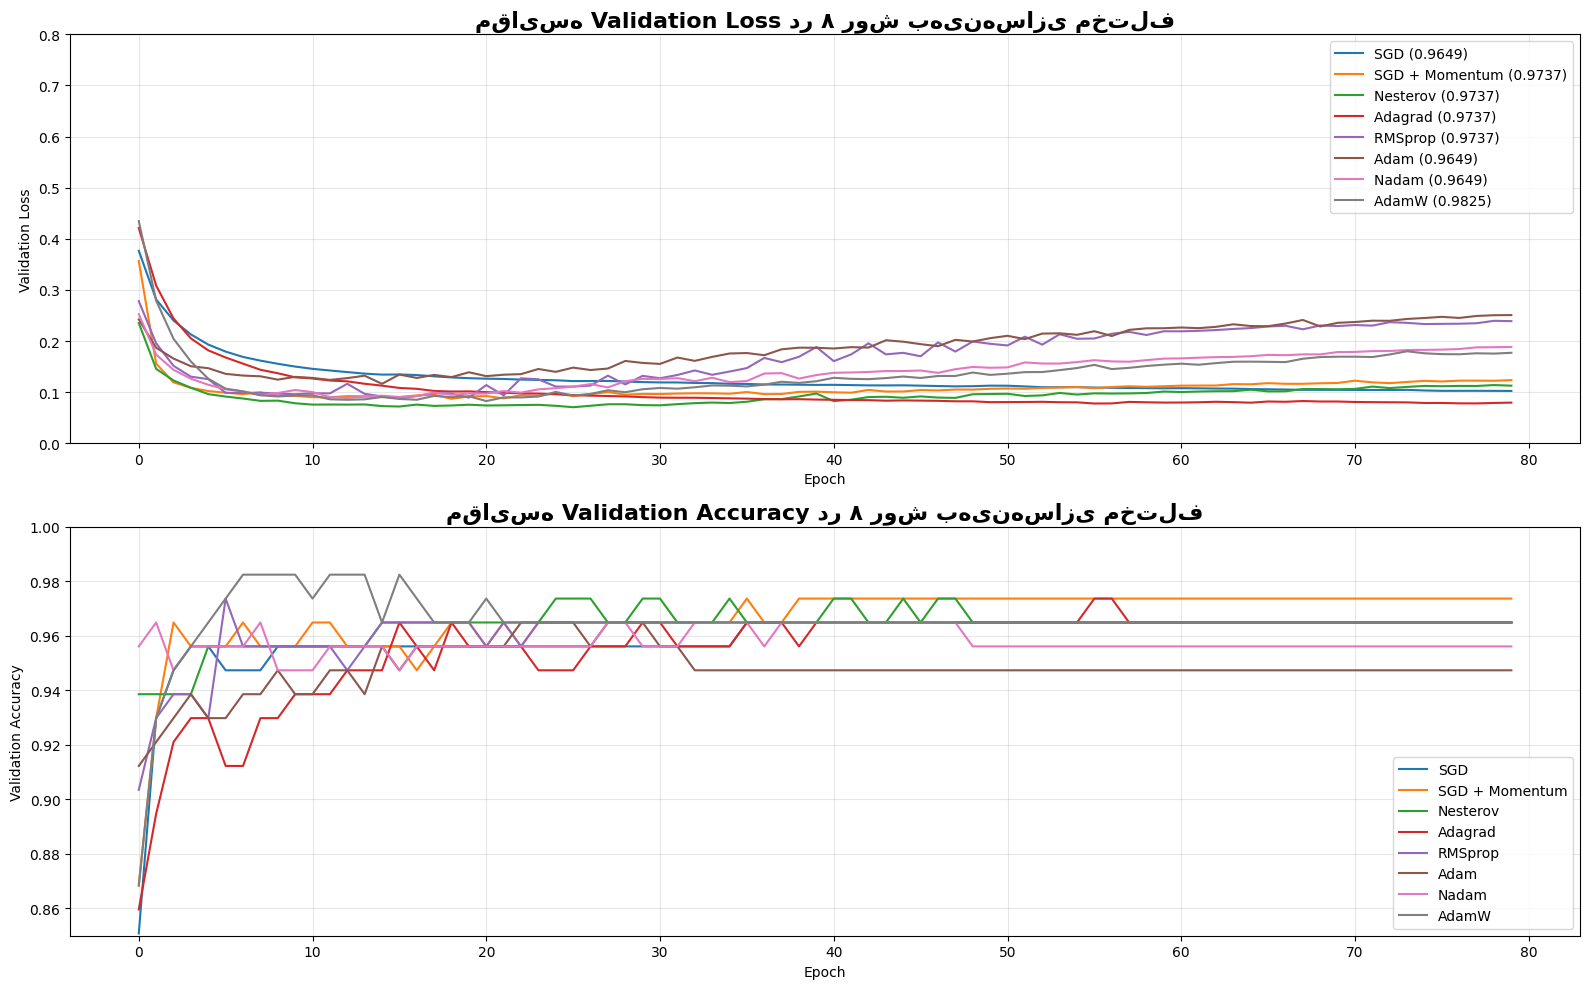


خلاصه نتایج نهایی (به ترتیب دقت نهایی):
 1. AdamW           | بهترین دقت: 0.9825 | دقت نهایی: 0.9649
 2. SGD + Momentum  | بهترین دقت: 0.9737 | دقت نهایی: 0.9737
 3. Nesterov        | بهترین دقت: 0.9737 | دقت نهایی: 0.9649
 4. Adagrad         | بهترین دقت: 0.9737 | دقت نهایی: 0.9649
 5. RMSprop         | بهترین دقت: 0.9737 | دقت نهایی: 0.9649
 6. SGD             | بهترین دقت: 0.9649 | دقت نهایی: 0.9649
 7. Adam            | بهترین دقت: 0.9649 | دقت نهایی: 0.9474
 8. Nadam           | بهترین دقت: 0.9649 | دقت نهایی: 0.9561


In [8]:
# مقایسه ۸ روش بهینه‌سازی در MLP - دیتاست سرطان سینه
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, AdamW
import warnings
warnings.filterwarnings("ignore")

# داده‌ها (همان قبلی)
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# لیست optimizerها
optimizers = {
    'SGD'              : SGD(learning_rate=0.01),
    'SGD + Momentum'   : SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov'         : SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'Adagrad'          : Adagrad(learning_rate=0.01),
    'RMSprop'          : RMSprop(learning_rate=0.001),
    'Adam'             : Adam(learning_rate=0.001),
    'Nadam'            : Nadam(learning_rate=0.001),
    'AdamW'            : AdamW(learning_rate=0.001, weight_decay=1e-5)
}

plt.figure(figsize=(16, 10))
histories = {}
results = []

print("در حال آموزش ۸ optimizer مختلف...\n" + "="*50)

for name, opt in optimizers.items():
    print(f"آموزش با {name:15} ...", end="")

    model = Sequential([
        Dense(64, activation='relu', kernel_initializer='he_normal', input_dim=30),
        Dense(32, activation='relu', kernel_initializer='he_normal'),
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(1, activation='sigmoid', kernel_initializer='he_normal')
    ])

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=80,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)

    histories[name] = history
    final_val_acc = max(history.history['val_accuracy'])
    results.append((name, final_val_acc, history.history['val_accuracy'][-1]))
    print(f" دقت نهایی: {final_val_acc:.4f}")

# رسم نمودار مقایسه Loss
plt.subplot(2, 1, 1)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} ({max(history.history["val_accuracy"]):.4f})')
plt.title('مقایسه Validation Loss در ۸ روش بهینه‌سازی مختلف', fontsize=16, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.8)

# رسم نمودار مقایسه Accuracy
plt.subplot(2, 1, 2)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')
plt.title('مقایسه Validation Accuracy در ۸ روش بهینه‌سازی مختلف', fontsize=16, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(0.85, 1.0)

plt.tight_layout()
plt.show()

# جدول خلاصه نتایج
print("\n" + "="*60)
print("خلاصه نتایج نهایی (به ترتیب دقت نهایی):")
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
for i, (name, best_acc, final_acc) in enumerate(results_sorted, 1):
    print(f"{i:2}. {name:15} | بهترین دقت: {best_acc:.4f} | دقت نهایی: {final_acc:.4f}")

In [12]:
import pandas as pd
from tabulate import tabulate
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, AdamW
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# داده‌ها (مشترک برای هر دو آزمایش)
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# تابع ساخت مدل MLP
def create_mlp(initializer='he_normal', optimizer=Adam(learning_rate=0.001)):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=initializer, input_dim=30),
        Dense(32, activation='relu', kernel_initializer=initializer),
        Dense(16, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# آزمایش 1: مقایسه Weight Initialization
print("در حال اجرای مقایسه Weight Initialization...\n")
initializers = ['he_normal', 'he_uniform', 'glorot_uniform', 'glorot_normal', 'random_normal']
init_results = []

for init in initializers:
    model = create_mlp(initializer=init)
    history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    best_val_acc = max(history.history['val_accuracy'])
    final_val_acc = history.history['val_accuracy'][-1]
    init_results.append({
        'روش اولیه‌سازی': init,
        'بهترین دقت': f"{best_val_acc:.4f}",
        'دقت نهایی': f"{final_val_acc:.4f}",
        'توصیه': 'بهترین' if init == 'he_normal' else 'خوب' if 'he_' in init else 'ضعیف' if init == 'random_normal' else 'متوسط'
    })

# آزمایش 2: مقایسه Optimizerها
print("در حال اجرای مقایسه Optimizerها...\n")
optimizers_dict = {
    'SGD': SGD(learning_rate=0.01),
    'SGD + Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'Adagrad': Adagrad(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.001),
    'Nadam': Nadam(learning_rate=0.001),
    'AdamW': AdamW(learning_rate=0.001, weight_decay=1e-5)
}

opt_results = []

for name, opt in optimizers_dict.items():
    model = create_mlp(optimizer=opt)
    history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    best_val_acc = max(history.history['val_accuracy'])
    final_val_acc = history.history['val_accuracy'][-1]
    opt_results.append({
        'رتبه': len(opt_results)+1,
        'Optimizer': name,
        'بهترین دقت': f"{best_val_acc:.4f}",
        'دقت نهایی': f"{final_val_acc:.4f}",
        'توصیه': 'بهترین انتخاب ۲۰۲۵' if name == 'AdamW' else 'عالی' if name in ['Nadam', 'Adam'] else 'خوب' if name in ['RMSprop', 'Nesterov'] else 'آموزشی'
    })

# تبدیل به DataFrame و مرتب‌سازی
df_init = pd.DataFrame(init_results)
df_init = df_init.sort_values(by='بهترین دقت', ascending=False).reset_index(drop=True)
df_init.index = df_init.index + 1

df_opt = pd.DataFrame(opt_results)
df_opt = df_opt.sort_values(by='بهترین دقت', ascending=False).reset_index(drop=True)
df_opt['رتبه'] = range(1, len(df_opt)+1)

# نمایش جدول‌ها با فرمت زیبا
print("="*80)
print("                جدول ۱: مقایسه روش‌های مقداردهی اولیه وزن (Weight Initialization)")
print("="*80)
print(tabulate(df_init, headers='keys', tablefmt='github', stralign='center', showindex=True))

print("\n" + "="*80)
print("                جدول ۲: مقایسه روش‌های بهینه‌سازی (Optimizer) - سال ۲۰۲۵")
print("="*80)
print(tabulate(df_opt[['رتبه', 'Optimizer', 'بهترین دقت', 'دقت نهایی', 'توصیه']],
               headers='keys', tablefmt='pretty', stralign='center', showindex=False))

# ذخیره در فایل (اختیاری - برای گزارش)
df_init.to_csv("نتایج_مقداردهی_اولیه_وزن.csv", index=False, encoding='utf-8-sig')
df_opt.to_csv("نتایج_بهینه_سازها.csv", index=False, encoding='utf-8-sig')
print("\nفایل‌های CSV با موفقیت ذخیره شدند:")
print("   → نتایج_مقداردهی_اولیه_وزن.csv")
print("   → نتایج_بهینه_سازها.csv")

در حال اجرای مقایسه Weight Initialization...



NotImplementedError: numpy() is only available when eager execution is enabled.